<a href="https://colab.research.google.com/github/thedatadj/FruitClassifier/blob/main/using_Support_Vector_Machines_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What I learned
- To use a Support Vector Machine algorithm for multiclass classification.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Loading the dataset

fruit_data = pd.read_table("/content/drive/MyDrive/Colab Notebooks/Workspace/Fruit Classifier/Fruit Classifier using KNN/fruit_data_with_colors.txt")


fruit_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
# Splitting the dataset into X and y.
# I utilize only two input features

X = fruit_data[["height", "width"]]
y = fruit_data["fruit_label"]


# I set "orange" as the positive class while
# considering all other classes as negative.

y = y == 3
y.name = "orange"

In [ ]:
# This function splits the data into training and testing sets.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

# Data distribution
shapes = {"X": [X.shape, X_train.shape, X_test.shape],
          "y": [y.shape, y_train.shape, y_test.shape],
          "Percent": ["100%", "75%", "25%"]}

pd.DataFrame(shapes, index=["Data", "Train", "Test"])

,X,y,Percent
Data,"(59, 2)","(59,)",100%
Train,"(44, 2)","(44, 1)",75%
Test,"(15, 2)","(15, 1)",25%


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

Z_train = pd.DataFrame(scaler.fit_transform(X_train))
Z_test = pd.DataFrame(scaler.transform(X_test))

Z_train.columns = X_train.columns
Z_test.columns = X_test.columns

<Axes: >

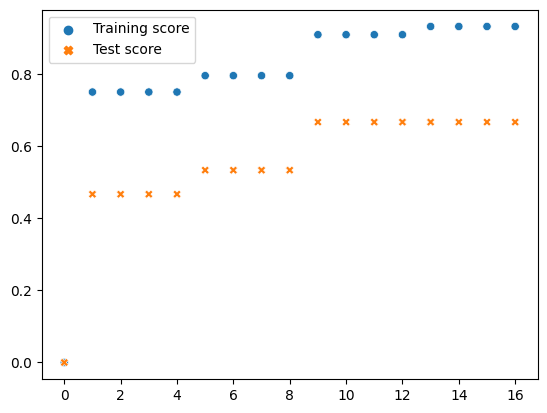

In [ ]:
from sklearn.svm import SVC

model = SVC()

Z_train_scores = [0]
Z_test_scores = [0]

for C in [0.1, 1, 15, 250]:
    model.C = C

    for g in [0.01, 1, 5, 10]:
      model.fit(Z_train, y_train.ravel())


      # Evaluate Model Performance on Training and Test Sets

      Z_train_scores.append(model.score(Z_train, y_train))
      Z_test_scores.append(model.score(Z_test, y_test))

scores = pd.DataFrame([Z_train_scores, Z_test_scores], index=["Training score", "Test score"])


sns.scatterplot(,scores.T)